# e (수학 상수)

아래 자료들을 참고하여 실습하면서 작성한 노트북입니다.

* [자연상수 e의 역사 이야기 / 뜻과 정의, 개념 / 값, 수식, 활용](https://blog.naver.com/prayer2k/222471310302), 수냐의 수학카페
* [자연 상수 e](https://terms.naver.com/entry.naver?docId=3568951&cid=58944&categoryId=58970), 네이버 지식백과
* [자연상수 e의 의미](https://angeloyeo.github.io/2019/09/04/natural_number_e.html), 공돌이의 수학정리노트
* [e  (mathematical constant)](https://en.wikipedia.org/wiki/E_(mathematical_constant)), Wikipedia

## 자연상수 정의 방법

### 지수와 지수거듭제곱의 관계로부터 정의

### 복리 계산으로부터 정의 (베르누이)

여기서 성장 비율은 다음의 값을 의미합니다.

$$
성장 비율 = {{원금 + 수익} \over 원금}
$$

1 년 동안 이자 지급 횟수를 점차 늘려감에 따라 성장 비율이 어떻게 달라지는지 살펴 봅니다.

* 1년에 $100$ % 이자를  $1$ 번 줄 때 1년 후 성장 비율: 

$$(1 + {1 \over 1}) = 2$$

* 6개월 마다 $100 \times {6 \over 12}$ % 이자를 $12 \over 6$ 번 줄 때 1년 후 성장 비율: 

$$(1 + {1 \over 2}) \times (1 + {1 \over 2}) = 2.25$$

* 1개월 마다 $100 \times {1 \over 12}$ % 이자를 $12$ 번 줄 때 1년 후 성장 비율: 

$$(1 + {1 \over 12})^{12} = ...$$

* 하루 마다 $100 \times {1 \over {365}}$ % 이자를 $365$ 번 줄 때 1년 후 성장 비율: 

$$(1 + {1 \over 365})^{365} = ...$$

* 1시간 마다 $100 \times {1 \over {365 \times 24}}$ % 이자를 $365 \times 24$ 번 줄 때 1년 후 성장 비율: 

$$(1 + {1 \over {365 \times 24}})^{365 \times 24} = ...$$

* n 번으로 나누어서 $100 \times {1 \over n}$ % 이자를 $n$ 번 줄 때 1년 후 성장 비율:

$$(1 + {1 \over n})^n = ...$$

* 무한히 쪼개서 줄 때 1년 후 성장 비율:

$$\lim_{n\to\infty} (1 + {1 \over n})^n = 2.7182818284...$$

오일러는 위에서 무한히 쪼개서 줄 때 1년 후 성장 비율에 해당하는 수를 자연상수 e로 명명합니다.

$$e = \lim_{n\to\infty} (1 + {1 \over n})^n$$

In [1]:
def compound_interest(n, k=1.0):
    return (1 + k/n)**n

In [2]:
n = [1, 2, 12, 365, 365*24]

interests = []
for i in n:
    interests.append(compound_interest(i))
    
print(interests)

[2.0, 2.25, 2.613035290224676, 2.7145674820219727, 2.7181266916179077]


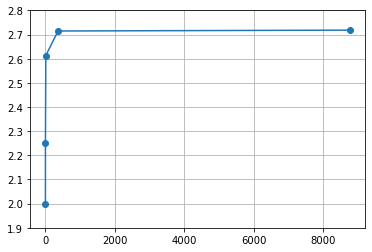

In [3]:
import matplotlib.pyplot as plt

plt.plot(n, interests, marker='o')
plt.ylim(1.9, 2.8)
plt.grid(True)
plt.show()